# Loan Eligiblity Prediction 🤝📜📃⚖️💵

### Motive :- 
In today’s world of recession and uncertain
economy following the pandemic, it is vital to have
healthy and sustainable financing no matter who
you are. A big part in ensuring this is to stay clear of
risky loan traps and prevent taking on
unsustainable debts.
A smart individual would diligently measure the
amount and purpose of each loan against their own
specific information to determine their ability to
pay the loan back. There is certainly a large scope
for programs and algorithms that can help in
making this decision with high accuracy.

In [45]:
#Importing Library's

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

The code imports several libraries that are commonly used for machine learning tasks, such as:

    ○ numpy for numerical computations
    ○ pandas for data manipulation and analysis
    ○ RandomForestClassifier from sklearn.ensemble for building Random Forest classification models
    ○ train_test_split from sklearn.model_selection for splitting the data into training and testing sets.
    ○ classification_report from sklearn.metrics for evaluating the performance of the model by computing the accuracy score.

In [46]:
# Reading DataSet and converting it to dataframe using pandas
df = pd.read_csv("./Track_1.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Unnamed: 0                                     600 non-null    int64 
 1   Number of people who will provide maintenance  600 non-null    int64 
 2   Loan History                                   600 non-null    object
 3   Purpose of taking loan                         591 non-null    object
 4   loan amount taken                              600 non-null    int64 
 5   Guarantor or Debtor                            600 non-null    object
 6   Number of years of employment                  447 non-null    object
 7   Marital Status                                 600 non-null    object
 8   Number of loans taken from current bank        600 non-null    int64 
 9   Age of the applicant in Number of Years        600 non-null    in

In [5]:
df['Other loans plans taken'].unique()

array(['none', 'stores', 'bank'], dtype=object)

### $\color{red}{\text{*Note:- }}$  From the description above we can observe that there are few coloumn which are not of any use for loan eligiblity prediction and some column are mistakenly inherited [i.e Unnamed: 0]. The other important observation wee can take out from the above description is about data type of each coloumn few coloumb have object as data type which can't be interpreted or used as a feature for training machine learning model.

In [48]:
# Droping the Column which are not useful

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(['1=defaulted'],axis=1)

In [51]:
#Replacing nan values with single space so they can be treated as entity

df['Objective'] = df['Objective'].replace(np.nan, '', regex=True)
df['Experience'] = df['Experience'].replace(np.nan, '', regex=True)

In [49]:
#Renameing Coloumn Name For Convinence

df.rename(columns = {'Number of people who will provide maintenance':'NPPM','Purpose of taking loan': 'Objective',
                     'loan amount taken': 'Amount','Guarantor or Debtor': 'Guarantor','Loan History':'LoanStatus',
                     'Number of years of employment': 'Experience','Marital Status' : 'M_Status','Number of loans taken from current bank': 'ExistingLoan',
                     'Age of the applicant in Number of Years': 'Age','amount in current account': 'CA_Balance',
                     'amount in savings account': 'SA_Balance','% of income paid as installment': 'PI_Payment',
                     'Working abroad or not': 'WorkAB', 'Is there telephone number available': 'PhN',
                     'time duration for loan': 'Tenure', 'Owned property': 'prop', 'Type of job performed': 'JobTyp',
                     'Type of Housing':'HouseT','Number of years of stay in current address': 'NOE','Loan Defaulted or not': 'prediction','Other loans plans taken':'olpt'}, inplace = True)

In [52]:
## Let's Check Out For Null Values In Data Frame

df.isna().sum()

NPPM            0
LoanStatus      0
Objective       0
Amount          0
Guarantor       0
Experience      0
M_Status        0
ExistingLoan    0
Age             0
CA_Balance      0
SA_Balance      0
PI_Payment      0
olpt            0
WorkAB          0
PhN             0
Tenure          0
prop            0
JobTyp          0
HouseT          0
NOE             0
prediction      0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NPPM          600 non-null    int64 
 1   LoanStatus    600 non-null    object
 2   Objective     600 non-null    object
 3   Amount        600 non-null    int64 
 4   Guarantor     600 non-null    object
 5   Experience    600 non-null    object
 6   M_Status      600 non-null    object
 7   ExistingLoan  600 non-null    int64 
 8   Age           600 non-null    int64 
 9   CA_Balance    600 non-null    object
 10  SA_Balance    600 non-null    object
 11  PI_Payment    600 non-null    int64 
 12  olpt          600 non-null    object
 13  WorkAB        600 non-null    object
 14  PhN           600 non-null    object
 15  Tenure        600 non-null    int64 
 16  prop          600 non-null    object
 17  JobTyp        600 non-null    object
 18  HouseT        600 non-null    object
 19  NOE     

## Defining Our Encoder:-
    
     In the very next step of creating a ML model. We will be encoding/converting the unusal datatype object to numeric data type we will be giving unique number to each class/unique item a coloum which will be accomplished by the following function

In [54]:
def preprocessing(df):
    df.Objective = df.Objective.replace({"New Car Purchase": 0, "Purchase of radio/television" : 1,'Purchase of furniture/equipment' : 2,'Old Car Repair': 3,'Education Loan': 4,
                                        'Loan for business establishment': 5,'Other repairs': 6,'Purchase of domestic appliances': 7,'Loan for retraining': 8,'': 9,'nan':9})

    df.Guarantor = df.Guarantor.replace({'none' : 0,'gaurantor' : 1,'co-applicant':  2,'': 3})

    df.LoanStatus = df.LoanStatus.replace({'critical account/other loans existing (not at this bank)' : 0,'existing loans paid back duly till now' : 1,'all loans at this bank paid back duly':  2,'delay in paying off loans in the past' : 3,
                                           'no loans taken/all loans paid back duly': 4,'': 5,})

    df.Experience = df.Experience.replace({'between 1 and 4 years': 0, 'greater than 4 years': 1,'less than a year': 2,'unemployed': 3,'':4})

    df.M_Status = df.M_Status.replace({'female and divorced/seperated/married': 0,'male and single': 1,'male and married/widowed': 2,
                                      'male and divorced/seperated': 3,'':4})

    df.CA_Balance = df.CA_Balance.replace({'no current account': 0,'less than 0': 1,'between 0 and 200': 3,'greater than 200': 4,'':5})

    df.SA_Balance = df.SA_Balance.replace({'less than 100': 0,'no savings account': 1,'between 500 and 1000': 2,
                                          'between 100 and 500': 3,'greater than 1000': 4,'':5})

    df.WorkAB = df.WorkAB.replace({'Yes': 1,'No': 0,'':2})

    df.PhN = df.PhN.replace({'Yes': 1,'No': 0,'':2})

    df.prop = df.prop.replace({'Real Estate': 0,'car or other property': 1,'No property': 2,'building society savings agreement/life insurance': 3,'':4})

    df.JobTyp = df.JobTyp.replace({'skilled employee / official': 0,'unskilled - resident': 1,'unemployed/ unskilled - non-resident': 2,'management/ self-employed/highly qualified employee/ officer': 3,'':4})

    df.HouseT = df.HouseT.replace({'own': 0,'for free': 1,'rent': 3,'':4})

    df.prediction = df.prediction.replace({2 : 0})
    
    df.olpt = df.olpt.replace({'none': 0,'stores': 2,'bank':3})
    
    return df

df = preprocessing(df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   NPPM          600 non-null    int64
 1   LoanStatus    600 non-null    int64
 2   Objective     600 non-null    int64
 3   Amount        600 non-null    int64
 4   Guarantor     600 non-null    int64
 5   Experience    600 non-null    int64
 6   M_Status      600 non-null    int64
 7   ExistingLoan  600 non-null    int64
 8   Age           600 non-null    int64
 9   CA_Balance    600 non-null    int64
 10  SA_Balance    600 non-null    int64
 11  PI_Payment    600 non-null    int64
 12  olpt          600 non-null    int64
 13  WorkAB        600 non-null    int64
 14  PhN           600 non-null    int64
 15  Tenure        600 non-null    int64
 16  prop          600 non-null    int64
 17  JobTyp        600 non-null    int64
 18  HouseT        600 non-null    int64
 19  NOE           600 non-null   

In [12]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [56]:
## Spliting Our Data Frame in X,Y with our features going in the x and our target/result going in the y variable

X = df.drop(['prediction'],axis=1)
Y = df['prediction']

In [14]:
#Spliting Our Data [ X(features) ,Y(result/prediction)] For Training and Testing Purposes. The split will be int the ratio of 80:20.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(17)
x_pca = pca.fit_transform(X)
print(" Old Shape : - " + str(X.shape))
print(" New Shape : - " + str(x_pca.shape))

 Old Shape : - (600, 19)
 New Shape : - (600, 17)


In [57]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X, Y, test_size=0.2)

In [63]:
print("Size of X Train:- " + str(Xp_train.shape))
print("Size of X Test:- " + str(Xp_test.shape))
print("Size of Y Train:- " + str(yp_train.shape))
print("Size of Y Test:- " + str(yp_test.shape))

Size of X Train:- (480, 20)
Size of X Test:- (120, 20)
Size of Y Train:- (480,)
Size of Y Test:- (120,)


In [392]:
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))

Size of X Train:- (352, 19)
Size of X Test:- (89, 19)
Size of Y Train:- (352,)
Size of Y Test:- (89,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [37]:
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=180, min_samples_split=5, n_estimators=152)

In [67]:
reg_rf12 = RandomForestClassifier(max_depth=180,min_samples_split= 5,criterion='gini',max_features = "auto",n_estimators= 2000, min_samples_leaf = 1, oob_score = True,n_jobs = -1,random_state =1)
reg_rf12.fit(Xp_train, yp_train)

/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=180, max_features='auto', min_samples_split=5,
                       n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=1)

In [71]:
ym_pred_1 = reg_rf12.predict(Xp_test)
print(metrics.classification_report(yp_test, ym_pred_1))

              precision    recall  f1-score   support

           0       0.50      0.30      0.38        33
           1       0.77      0.89      0.82        87

    accuracy                           0.73       120
   macro avg       0.64      0.59      0.60       120
weighted avg       0.70      0.72      0.70       120



In [43]:
print(metrics.classification_report(yp_test, ym_pred))

NameError: name 'ym_pred' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [19]:
df1 = pd.read_csv("./testing_data.csv")

In [20]:
#Renameing Coloumn Name For Convinence
df1.rename(columns = {'Number of people who will provide maintenance':'NPPM','Purpose of taking loan': 'Objective',
                     'loan amount taken': 'Amount','Guarantor or Debtor': 'Guarantee','Loan History':'LoanStatus',
                     'Number of years of employment': 'Experience','Marital Status' : 'M_Status','Number of loans taken from current bank': 'ExistingLoan',
                     'Age of the applicant in Number of Years': 'Age','amount in current account': 'CA_Balance',
                     'amount in savings account': 'SA_Balance','% of income paid as installment': 'PI_Payment',
                     'Working abroad or not': 'WorkAB', 'Is there telephone number available': 'PhNum',
                     'time duration for loan': 'Tenure', 'Owned property': 'prop', 'Type of job performed': 'JobTyp',
                     'Type of Housing':'HouseT','Number of years of stay in current address': 'NOE','Loan Defaulted or not': 'prediction'}, inplace = True)

In [21]:
df1 = Preprocessing(df1)

NameError: name 'Preprocessing' is not defined

In [22]:
def Preprocessing(df2):
    df2.Objective = df2.Objective.replace({"New Car Purchase": 0, "Purchase of radio/television" : 1,'Purchase of furniture/equipment' : 2,'Old Car Repair': 3,'Education Loan': 4,
                                    'Loan for business establishment': 5,'Other repairs': 6,'Purchase of domestic appliances': 7,'Loan for retraining': 8})
    df2.Guarantee = df2.Guarantee.replace({'none' : 0,'gaurantor' : 1,'co-applicant':  2})
    df2.LoanStatus = df2.LoanStatus.replace({'critical account/other loans existing (not at this bank)' : 0,'existing loans paid back duly till now' : 1,'all loans at this bank paid back duly':  2,'delay in paying off loans in the past' : 3,
                                        'no loans taken/all loans paid back duly': 4})
    df2.Experience = df2.Experience.replace({'between 1 and 4 years': 0, 'greater than 4 years': 1,'less than a year': 2,'unemployed': 3,"": 4})
    df2.M_Status = df2.M_Status.replace({'female and divorced/seperated/married': 0,'male and single': 1,'male and married/widowed': 2,
                                    'male and divorced/seperated': 3})
    df2.CA_Balance = df2.CA_Balance.replace({'no current account': 0,'less than 0': 1,'between 0 and 200': 3,'greater than 200': 4})
    df2.SA_Balance = df2.SA_Balance.replace({'less than 100': 0,'no savings account': 1,'between 500 and 1000': 2,
                                        'between 100 and 500': 3,'greater than 1000': 4})
    df2.WorkAB = df2.WorkAB.replace({'Yes': 1,'No': 0})
    df2.PhNum = df2.PhNum.replace({'Yes': 1,'No': 0})
    df2.prop = df2.prop.replace({'Real Estate': 0,'car or other property': 1,'No property': 2,'building society savings agreement/life insurance': 3})
    df2.JobTyp = df2.JobTyp.replace({'skilled employee / official': 0,'unskilled - resident': 1,'unemployed/ unskilled - non-resident': 2,'management/ self-employed/highly qualified employee/ officer': 3})
    df2.HouseT = df2.HouseT.replace({'own': 0,'for free': 1,'rent': 3})
    return df2

In [48]:
df1

,Unnamed: 0,NPPM,LoanStatus,Objective,Amount,Guarantee,Experience,M_Status,ExistingLoan,Age,...,PI_Payment,Other loans plans taken,WorkAB,PhNum,Tenure,prop,JobTyp,HouseT,NOE,prediction
0,600,1,existing loans paid back duly till now,Purchase of radio/television,1278,none,NaN,male and single,1,36,...,4,none,Yes,Yes,24,Real Estate,management/ self-employed/highly qualified emp...,own,1,NaN
1,601,1,critical account/other loans existing (not at ...,Old Car Repair,11590,none,between 1 and 4 years,female and divorced/seperated/married,2,24,...,2,bank,Yes,No,48,car or other property,unskilled - resident,rent,4,NaN
2,602,1,existing loans paid back duly till now,Purchase of radio/television,1366,none,less than a year,female and divorced/seperated/married,1,22,...,3,none,Yes,No,9,building society savings agreement/life insurance,skilled employee / official,rent,4,NaN
3,603,1,critical account/other loans existing (not at ...,Purchase of furniture/equipment,14179,none,greater than 4 years,male and single,2,30,...,4,none,Yes,Yes,39,building society savings agreement/life insurance,management/ self-employed/highly qualified emp...,own,4,NaN
4,604,1,existing loans paid back duly till now,Old Car Repair,1236,none,between 1 and 4 years,male and single,1,50,...,2,none,Yes,No,6,building society savings agreement/life insurance,skilled employee / official,rent,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,995,1,delay in paying off loans in the past,Other repairs,1512,none,between 1 and 4 years,male and married/widowed,2,61,...,3,stores,Yes,No,15,building society savings agreement/life insurance,skilled employee / official,own,3,NaN
396,996,1,existing loans paid back duly till now,Loan for business establishment,1950,none,greater than 4 years,male and single,2,34,...,4,stores,Yes,Yes,18,car or other property,skilled employee / official,own,1,NaN
397,997,1,critical account/other loans existing (not at ...,New Car Purchase,7228,none,between 1 and 4 years,male and single,2,39,...,1,none,Yes,No,11,building society savings agreement/life insurance,unskilled - resident,own,4,NaN
398,998,1,critical account/other loans existing (not at ...,Loan for business establishment,2326,none,between 1 and 4 years,male and single,1,27,...,2,bank,Yes,No,15,car or other property,skilled employee / official,own,4,NaN


In [24]:
df.head()

,NPPM,LoanStatus,Objective,Amount,Guarantor,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE,prediction
0,1,0,0,1028,0,0,0,2,36,0,0,4,1,0,18,0,0,0,3,1
1,1,1,1,10222,0,1,1,1,37,0,1,4,1,1,48,1,0,0,3,1
2,1,1,1,701,0,0,2,1,40,1,0,4,1,0,12,0,1,0,2,1
3,1,1,1,1670,0,2,0,1,22,3,0,4,1,1,9,1,0,0,2,0
4,1,0,0,1163,0,0,1,1,44,0,2,4,1,1,12,0,0,0,4,1


In [28]:
df['prediction'].value_counts()

1    305
0    136
Name: prediction, dtype: int64

In [36]:
#


,NPPM,LoanStatus,Objective,Amount,Guarantor,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE,prediction
0,1,0,0,1028,0,0,0,2,36,0,0,4,1,0,18,0,0,0,3,1
1,1,1,1,10222,0,1,1,1,37,0,1,4,1,1,48,1,0,0,3,1
2,1,1,1,701,0,0,2,1,40,1,0,4,1,0,12,0,1,0,2,1
3,1,1,1,1670,0,2,0,1,22,3,0,4,1,1,9,1,0,0,2,0
4,1,0,0,1163,0,0,1,1,44,0,2,4,1,1,12,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1,4,5,12204,0,0,1,1,48,3,1,2,1,1,48,1,3,0,2,1
591,1,1,1,1473,0,2,2,1,39,0,0,3,1,1,18,0,0,0,4,1
592,1,1,1,2073,2,0,0,1,28,0,3,4,1,0,12,0,0,0,2,1
595,1,3,1,15653,0,1,1,2,21,0,0,2,1,1,60,1,0,0,4,1


In [35]:
data.head()

,NPPM,LoanStatus,Objective,Amount,Guarantor,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE,prediction
0,1,0,0,1028,0,0,0,2,36,0,0,4,1,0,18,0,0,0,3,1
1,1,1,1,10222,0,1,1,1,37,0,1,4,1,1,48,1,0,0,3,1
2,1,1,1,701,0,0,2,1,40,1,0,4,1,0,12,0,1,0,2,1
3,1,1,1,1670,0,2,0,1,22,3,0,4,1,1,9,1,0,0,2,0
4,1,0,0,1163,0,0,1,1,44,0,2,4,1,1,12,0,0,0,4,1


In [ ]:
data.drop(df[(data['prediction'] == 1 )].index, inplace=True)

## Improving F1 Score

In [71]:
data = df

In [76]:
data.isna().sum()

NPPM            0
LoanStatus      0
Objective       9
Amount          0
Guarantor       0
Experience      0
M_Status        0
ExistingLoan    0
Age             0
CA_Balance      0
SA_Balance      0
PI_Payment      0
WorkAB          0
PhN             0
Tenure          0
prop            0
JobTyp          0
HouseT          0
NOE             0
prediction      0
dtype: int64

In [114]:
data.shape

(600, 20)

In [112]:
data = df

In [113]:
data1['prediction'].value_counts()

1    422
0    178
Name: prediction, dtype: int64

## Method 1: Undersampling

In [120]:
# Class count
count_class_1, count_class_0 = data.prediction.value_counts()

# Divide by class
df_class_0 = data[data['prediction'] == 0]
df_class_1 = data[data['prediction'] == 1]

In [121]:
print("Data of 0 Class :- " + str(df_class_0.shape))
print("Data of 1 Class :- " + str(df_class_1.shape))

Data of 0 Class :- (178, 20)
Data of 1 Class :- (422, 20)


In [122]:
print("Number of data in class 0:- " + str(count_class_0))
print("Number of data in class 1:- " + str(count_class_1))

Number of data in class 0:- 178
Number of data in class 1:- 422


In [134]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.prediction.value_counts())

Random under-sampling:
1    178
0    178
Name: prediction, dtype: int64


In [137]:
X_m1 = df_test_under.drop('prediction',axis='columns')
y_m1  = df_test_under['prediction']

from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_m1, y_m1, test_size=0.2, random_state=15, stratify=y_m1)

In [138]:
print("Size of X Train:- " + str(Xm_train.shape))
print("Size of Y Train:- " + str(ym_train.shape))
print("Size of X Test:- " + str(Xm_test.shape))
print("Size of Y Test:- " + str(ym_test.shape))

Size of X Train:- (284, 19)
Size of Y Train:- (284,)
Size of X Test:- (72, 19)
Size of Y Test:- (72,)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,criterion='gini',max_features = "auto",n_estimators= 2000, min_samples_leaf = 1, oob_score = True,n_jobs = -1,random_state =1)
reg_rf.fit(Xm_train, ym_train)
ym_pred = reg_rf.predict(Xm_test)
print(metrics.classification_report(ym_test, ym_pred))

NameError: name 'Xm_train' is not defined

## Method2: Oversampling

In [165]:
count_class_1, count_class_0

(422, 178)

In [176]:
df_class_0_over = df_class_0.sample(count_class_1,replace=True)
df_test_over = pd.concat([df_class_1,df_class_0_over],axis=0)

print('Random over-sampling:')
print(df_test_over.prediction.value_counts())

Random over-sampling:
1    422
0    422
Name: prediction, dtype: int64


In [177]:
X_m2 = df_test_over.drop('prediction',axis='columns')
y_m2 = df_test_over['prediction']f

from sklearn.model_selection import train_test_split
X_m2_train, X_m2_test, y_m2_train, y_m2_test = train_test_split(X_m2, y_m2, test_size=0.2, random_state=15, stratify=y_m2)

In [178]:
y_m2_train.value_counts()

1    338
0    337
Name: prediction, dtype: int64

In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

reg_rf_1 = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf_1.fit(X_m2_train, y_m2_train)
ym_pred = reg_rf_1.predict(X_m2_test)
print(metrics.classification_report(y_m2_test, ym_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        85
           1       0.93      0.81      0.87        84

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



In [276]:
data.head()

,NPPM,LoanStatus,Objective,Amount,Guarantor,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE,prediction
0,1,0,0,1028,0,0,0,2,36,0,0,4,1,0,18,0,0,0,3,1
1,1,1,1,10222,0,1,1,1,37,0,1,4,1,1,48,1,0,0,3,1
2,1,1,1,701,0,0,2,1,40,1,0,4,1,0,12,0,1,0,2,1
3,1,1,1,1670,0,2,0,1,22,3,0,4,1,1,9,1,0,0,2,0
4,1,0,0,1163,0,0,1,1,44,0,2,4,1,1,12,0,0,0,4,1


In [278]:
import numpy as np
# import pandas pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


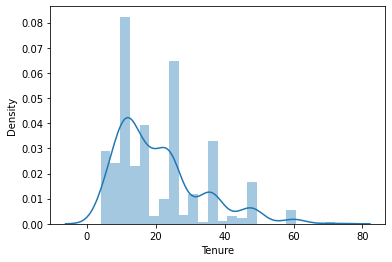

In [286]:
sns.distplot(data['Tenure']) 
plt.show()

/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


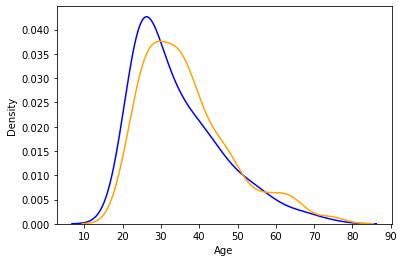

In [287]:
sns.distplot(data[data['prediction'] == 0]['Age'], hist=False, color="blue") 
sns.distplot(data[data['prediction'] == 1]['Age'], hist=False, color="orange")
plt.show()

In [299]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_m2_train)
X_train_norm = X_m2_train

# transform training data
X_train_norm['Amount'] = norm.transform(X_m2_train['Amount'])

X_test_norm = X_m2_test
# transform testing dataabs
X_test_norm['Amount'] = norm.transform(X_m2_test['Amount'])

/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 4153.  2100.  1980.  1546.  1228.  2360.   959.  9566.  2671.  1721.
  3556.  2384.  1938.   902.  6110.  3123.  3343.  1309.  5801. 11938.
  1358.  9398.  1333.  1559.  1881.  3595.  2659.  6288.  1501.  4594.
  1393.  1231.  1221.  4455.  7485.  3832.  7865.  2241.  4870.  3123.
  3345.  2675.  6361.  2169.   276.  3651.  4455.  7763.   522.  3074.
   753.  1216.  1126.  1938.  4272.   590.  4530.  8978.  1274.  5045.
  3594.  3190.  1258.  2538.   766.  1943.  4817.  2957.   884.  3757.
  1938. 10297.  3123.  2320.  4686.  4844.  3939.  6468.  1382.  3590.
  5129.  1155.  2462.  1092. 12204.  5804.  2901.  1275.   625.  2136.
  2406.  2538.   683.  1274.  8858.  1938.  2670.  1316.  1412.  1542.
  1371.  1620.  3060.  4463.  3060.  1493.  2389.  1049.  1503.  4241.
  1288.  4473.  2462. 11816.  2255.  3979.  1424.  1437.  1474.  3060.
  1413.  5293.  1901.  2748.   806.   907.   846.  1766.  1313.  1437.
  1264.  1469.  2625.   900.  1053.  3249. 10297.  4933.   609.  1169.
  1935.  1374.   684.  3966.  1295.  5381.  2969.  1295.   888.  1670.
   717.  7253.  3108.  1938.  1358.  5771.  1358.  2779.  2039.  1264.
  6078.  1206.  8978.  1355.  2848.  2445.  3414.  1123.  3863.  1592.
  2384.  6204.  3060.  5842.  1285.  3105.  2671.  3384. 10875.   766.
   947.  1591.  1123.  1358.  6887.  6761.  1240.  1980.   947.  5179.
  1217.  1344.   959.  2753.  1957.  4057.  2538.  1345.  6761.  3652.
  1364.  2039.  1546.  6070.  2799.  2225.  6836.  1569.  1860.  3966.
  2538.  3394.  1484.  1872.  1474.  1670.  5129.  1098.  4454.  2924.
   996.  3092.  2039.  4843.  2246.  1274.  7855.  4605.   708.  1193.
  2169.  3949.  5493.   727.  2333.  4455.  7119.  1047.  2353.  1345.
  2762.  3108.  1193.  3676.  4439.  1418.  3069.  1842.  3518.  5943.
  3384.  3386.  2366.   936.   860.  1422.  6560.  2039.   884.   338.
  3749.  2149.  3235. 10127.  2671.   909.  3485. 10297.   458.  1657.
  2096.  9157.  8335.  2862.  3114.  5248.   797.   368.  1193.  2384.
  7629.  2145.  6468.  1204.  5129. 11328.  3001.  1361.  1867. 11998.
  1501.  2384.  3275.  2746.  1203.  1024.  2746.  2759.  7374.  2146.
  1236.  3384.  5103.  1924.  2964. 11938.  8358.  1028.  4463.   672.
  1530.  2647.  3031.  1544.  2384.   409.  3342.  6304.  1377.   750.
  5293.  1331.  3959.  3414.  9271.  4272.  3578.   759.  3414.  6468.
  1158.  1131.   915.  1403.   685.  5951.  2439.  3711.  7408.  3149.
  5129.  4526.  1217.  1291.  6615.  1188.  1264.  1345.  7865.   959.
  2169.  1455.  2625.   626.   960.  1238.  6887.  9055.  7882.  1347.
  3643.  1823.  1255.   947.   626.  1216.  2325.   750.  9271.  4042.
  3021.   804.  2631.   900.  3488.   894.   750.  2538.  6560.  3114.
  1101.  1800.  4844.  7763.  2116.  3966.  1371.  2406.  5951.  3357.
  1207.  4153.  1352.  3386.  1246.  7678.  4370.  1484.  2522.  6887.
  3077.  1597.  3447.  1922.  4463.  3573.  1225.  6560.  2337.  1410.
  3398.  3599.  2251.  1980.  4576.  7758.  5179.  1795.  6288.  2745.
  4843.  3905.  2064.  2101.  4370.  5511.   745.  1264.  3123.   759.
   759.  1922. 10297.  4605.   585.  6836.  1924.  6527.  1453.  3124.
  1246.  1568.  2462.  1371.  7408.  2578.  1299.  6872.  1743.  3416.
  1574.  3844.  1516.  3114.  9398.  1437. 10144.  2613.  7814.  1082.
  1237.  1393.   902.  1343. 11816.  1755.  8978.  2746.  3499.   652.
   915.  1199.  3656.   841.  1175.  3512.  1076. 11998.  1376.  2149.
  4795.  2910.  1924.  2751.  1287.  6468.   926.  1938.  3959.  3804.
  1503.  7485.  5433.  1275.  1925.  2108.  1308.  1309.  2375.  1953.
  3031.  6229.   802.  4605.  1358.   709.  2969.  6403.  5324.   959.
  1131.  1534.  7409.  3966.  4297.  1168.  1258.  1549.  2022.  1533.
  8086.  2028.  1285.  3229.  2223.  5943.  1154.  1068.  1842.  2039.
  1905.  2473.  2246.   795.  2333.  8947.  1107.  1577.  1163.  3499.
  3017.  3509. 14318.  4221. 11816.  1217.  3049.  3114.  1344.  3835.
  2100. 10961.  9271.   518. 14896.  1300.  1943.  4788.  3123.  1042.
  3973.  1995.   976.  1797.  2687.   795.  5951. 11054.  4151.  4526.
  1963.  9271.  8335.  1845.  3108.  2384.  1525.  2606.  3062.  1819.
  1913.  1940.  1050.  7865.  1480.  1943.  1239.  2249.   362.  1520.
  3345.  2145.  2145.  6458.  1659.  1842.  1345.  2012.  1471.  2073.
  1864.  1898.   343.  3620.  1597.  1501.  2746.  1386.  1437.  3244.
  2134.  8386.   759.  7408.  1655.  1715.  4297.  7057.   760.  1372.
   766.  4675.  1345.   929.  3650.  3804.  2671.  1131.  3780.  1318.
   709.  1216.  1414.  1747.  5743.  1670.  1572.  5866.  8978.  1038.
  2225.  1938. 10961.  2864.  2247.  1209.  1538.  4605.  3441.  2476.
  2859. 14896.  7238.  2679.  4351.  3123.   937.  1984. 12169.  2746.
  1927.  2331.  1924.  3331.   915.  1209.  1231.  8335.  1437.  1346.
 10222.  7485.  6313.  3384.  2978.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
reg_rf_1 = RandomForestClassifier(max_depth=180,min_samples_split= 5,criterion='gini',max_features = "auto",n_estimators= 2000, min_samples_leaf = 1, oob_score = True,n_jobs = -1,random_state =1)
reg_rf_1.fit(X_m2_train, y_m2_train)
ym_pred = reg_rf_1.predict(X_m2_test)
print(metrics.classification_report(y_m2_test, ym_pred))

NameError: name 'X_m2_train' is not defined

In [303]:
X_train_norm

,NPPM,LoanStatus,Objective,Amount,Guarantor,Experience,M_Status,ExistingLoan,Age,CA_Balance,SA_Balance,PI_Payment,WorkAB,PhN,Tenure,prop,JobTyp,HouseT,NOE
319,1,1,2,4153,2,0,1,1,42,1,0,2,1,0,18,1,0,0,3
273,1,1,1,2100,2,0,1,1,37,4,0,4,1,0,18,0,0,0,2
519,1,1,2,1980,2,2,0,2,19,0,0,2,1,0,9,1,0,3,2
510,2,1,0,1546,0,0,1,1,31,0,0,3,0,0,10,0,1,0,2
40,1,1,0,1228,0,0,0,1,24,1,0,4,1,0,12,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,1,1,10222,0,1,1,1,37,0,1,4,1,1,48,1,0,0,3
47,1,2,3,7485,0,3,0,1,53,0,1,4,1,1,30,0,3,0,1
153,2,1,3,6313,0,4,1,1,41,0,1,3,1,1,24,1,3,0,4
272,1,0,2,3384,0,0,3,1,44,1,0,1,1,1,6,0,3,3,4


In [395]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_1train = scaler.fit_transform(X_m2_train)
X__1test = scaler.transform(X_m2_test)

In [403]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=50, p=1)
clf.fit(X_1train, y_m2_train)
y_pred_test = clf.predict(X__1test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_m2_test, y_pred_test)}")

Sklearn KNN Accuracy: 0.6686390532544378


In [440]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
svc=SVC(probability=True, kernel='linear')
abc=AdaBoostClassifier(n_estimators=900, random_state=5,learning_rate=1)
abc.fit(X_1train, y_m2_train)
y_head=abc.predict(X__1test)
print("AdaBoosting Classifier Algoritması başarım sonucu: ",abc.score(X__1test,y_m2_test))

AdaBoosting Classifier Algoritması başarım sonucu:  0.7928994082840237


In [491]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(min_samples_leaf=93212,max_depth=8,max_features='auto',subsample=0.8,n_estimators=500,learning_rate=0.5,random_state=100)

# Fit train data to GBC

gbc.fit(X_1train, y_m2_train)

/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, e

GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features='auto',
                           min_samples_leaf=93212, n_estimators=500,
                           random_state=100, subsample=0.8)

In [493]:
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, gbc.predict(X_test)))

GBC accuracy is 0.66


/Users/hemangjiwnani/miniforge3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [72]:
import lightgbm as lgb

     |████████████████████████████████| 1.5 MB 3.6 MB/s            
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /Users/hemangjiwnani/miniforge3/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/rf/qpg48nmj40j_kst8hsc4pxk40000gn/T/pip-install-sx0q_6vw/lightgbm_00be243750404f57b8ae7d8d32d5d84c/setup.py'"'"'; __file__='"'"'/private/var/folders/rf/qpg48nmj40j_kst8hsc4pxk40000gn/T/pip-install-sx0q_6vw/lightgbm_00be243750404f57b8ae7d8d32d5d84c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/rf/qpg48nmj40j_kst8hsc4pxk40000gn/T/pip-wheel-15cb97o6
       cwd: /private/var/folders/rf/qpg48nmj40j_kst8hsc4pxk40000gn/T/pip-install-sx